In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('../data/mxmh_survey_results.csv')
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [4]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [5]:
data.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [6]:
data['Primary streaming service'].unique(), len(data[data['Primary streaming service'].isna()])

(array(['Spotify', 'Pandora', 'YouTube Music',
        'I do not use a streaming service.', 'Apple Music',
        'Other streaming service', nan], dtype=object),
 1)

In [7]:
data['Hours per day'].value_counts()

2.00     173
3.00     120
1.00     117
4.00      83
5.00      54
6.00      47
8.00      29
10.00     20
0.50      20
1.50      17
7.00      15
12.00      9
0.00       6
2.50       6
0.25       3
24.00      3
9.00       3
15.00      2
0.70       1
4.50       1
20.00      1
16.00      1
14.00      1
13.00      1
0.10       1
11.00      1
18.00      1
Name: Hours per day, dtype: int64

In [8]:
data['While working'].unique(), len(data[data['While working'].isna()])

(array(['Yes', 'No', nan], dtype=object), 3)

In [9]:
data['While working'].value_counts()

Yes    579
No     154
Name: While working, dtype: int64

In [10]:
data['Instrumentalist'].unique(), len(data[data['Instrumentalist'].isna()])

(array(['Yes', 'No', nan], dtype=object), 4)

In [11]:
data['Instrumentalist'].value_counts()

No     497
Yes    235
Name: Instrumentalist, dtype: int64

In [12]:
data['Composer'].unique(), len(data[data['Composer'].isna()])

(array(['Yes', 'No', nan], dtype=object), 1)

In [13]:
data['Composer'].value_counts()

No     609
Yes    126
Name: Composer, dtype: int64

In [14]:
data['Fav genre'].unique(), len(data[data['Fav genre'].isna()])

(array(['Latin', 'Rock', 'Video game music', 'Jazz', 'R&B', 'K pop',
        'Country', 'EDM', 'Hip hop', 'Pop', 'Rap', 'Classical', 'Metal',
        'Folk', 'Lofi', 'Gospel'], dtype=object),
 0)

In [15]:
data['Fav genre'].value_counts()

Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: Fav genre, dtype: int64

In [16]:
data['Exploratory'].unique(), len(data[data['Exploratory'].isna()])

(array(['Yes', 'No'], dtype=object), 0)

In [17]:
data['Exploratory'].value_counts()

Yes    525
No     211
Name: Exploratory, dtype: int64

In [18]:
data['Foreign languages'].unique(), len(data[data['Foreign languages'].isna()])

(array(['Yes', 'No', nan], dtype=object), 4)

In [19]:
data['Foreign languages'].value_counts()

Yes    404
No     328
Name: Foreign languages, dtype: int64

In [20]:
data['BPM'].unique(), len(data[data['BPM'].isna()])

(array([1.56000000e+02, 1.19000000e+02, 1.32000000e+02, 8.40000000e+01,
        1.07000000e+02, 8.60000000e+01, 6.60000000e+01, 9.50000000e+01,
        9.40000000e+01, 1.55000000e+02,            nan, 1.25000000e+02,
        8.80000000e+01, 1.48000000e+02, 1.03000000e+02, 1.20000000e+02,
        9.90000000e+01, 1.18000000e+02, 7.90000000e+01, 1.69000000e+02,
        1.36000000e+02, 1.01000000e+02, 1.26000000e+02, 1.83000000e+02,
        1.42000000e+02, 7.50000000e+01, 8.90000000e+01, 1.40000000e+02,
        1.61000000e+02, 8.00000000e+01, 1.30000000e+02, 1.47000000e+02,
        7.70000000e+01, 1.15000000e+02, 1.57000000e+02, 9.00000000e+01,
        1.28000000e+02, 9.60000000e+01, 9.10000000e+01, 5.50000000e+01,
        8.50000000e+01, 1.60000000e+02, 1.08000000e+02, 1.70000000e+02,
        1.74000000e+02, 1.27000000e+02, 1.65000000e+02, 1.13000000e+02,
        1.67000000e+02, 1.10000000e+02, 1.50000000e+02, 9.30000000e+01,
        1.09000000e+02, 1.75000000e+02, 1.62000000e+02, 1.890000

In [21]:
genre_list = ['Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

frequency_df = pd.DataFrame()

for genre in genre_list:
    frequency_df = pd.concat([frequency_df,pd.DataFrame(data[genre].value_counts(sort=False, dropna=False)).T])

frequency_df

,Never,Sometimes,Very frequently,Rarely
Frequency [Country],343,111,49,233
Frequency [EDM],307,146,89,194
Frequency [Folk],292,145,78,221
Frequency [Gospel],535,52,14,135
Frequency [Hip hop],181,218,123,214
Frequency [Jazz],261,175,53,247
Frequency [K pop],416,67,77,176
Frequency [Latin],443,88,33,172
Frequency [Lofi],280,160,85,211
Frequency [Metal],264,134,146,192


In [22]:
mental_issue = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

mental_df = pd.DataFrame()

for mental in mental_issue:
    mental_df = pd.concat([mental_df, pd.DataFrame(data[mental].value_counts(sort=False, dropna=False)).T])

mental_df

,3.0,7.0,9.0,8.0,4.0,5.0,2.0,1.0,6.0,10.0,0.0,7.5,3.5,8.5,5.5
Anxiety,69,122,56,115,56,59,44,29,83,67,35,1.0,NaN,NaN,NaN
Depression,59,96,38,77,58,56,93,40,88,45,84,NaN,2.0,NaN,NaN
Insomnia,68,59,27,49,59,58,88,82,62,34,149,NaN,1.0,NaN,NaN
OCD,64,34,14,28,48,54,96,95,33,20,248,NaN,NaN,1.0,1.0


In [23]:
data['Music effects'].unique(), len(data[data['Music effects'].isna()])

(array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object), 8)

In [24]:
data['Music effects'].value_counts()

Improve      542
No effect    169
Worsen        17
Name: Music effects, dtype: int64

In [25]:
data['Permissions'].unique(), len(data[data['Permissions'].isna()])

(array(['I understand.'], dtype=object), 0)

In [26]:
data.duplicated().sum()

0

In [27]:
data.isnull().sum().sort_values(ascending=False) /len(data)

BPM                             0.145380
Music effects                   0.010870
Instrumentalist                 0.005435
Foreign languages               0.005435
While working                   0.004076
Primary streaming service       0.001359
Composer                        0.001359
Age                             0.001359
Frequency [Video game music]    0.000000
Frequency [Pop]                 0.000000
Frequency [R&B]                 0.000000
Frequency [Rap]                 0.000000
Frequency [Rock]                0.000000
Timestamp                       0.000000
Anxiety                         0.000000
Depression                      0.000000
Frequency [Lofi]                0.000000
Insomnia                        0.000000
OCD                             0.000000
Frequency [Metal]               0.000000
Frequency [Hip hop]             0.000000
Frequency [Latin]               0.000000
Frequency [K pop]               0.000000
Frequency [Jazz]                0.000000
Frequency [Gospe

In [28]:
data[data['Music effects'].isna()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
161,8/28/2022 18:59:40,18.0,Other streaming service,2.0,Yes,No,No,K pop,No,Yes,...,Sometimes,Never,Never,Never,0.0,2.0,0.0,0.0,NaN,I understand.
168,8/28/2022 19:16:43,19.0,Spotify,3.0,Yes,Yes,No,K pop,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,8.0,9.0,6.0,0.0,NaN,I understand.
338,8/29/2022 8:28:46,21.0,YouTube Music,2.0,Yes,No,No,EDM,No,Yes,...,Rarely,Rarely,Sometimes,Very frequently,10.0,10.0,5.0,7.0,NaN,I understand.
441,8/31/2022 18:56:31,21.0,Apple Music,1.5,Yes,Yes,No,Folk,No,No,...,Never,Never,Sometimes,Never,3.0,3.0,1.0,0.0,NaN,I understand.
532,9/2/2022 19:20:33,67.0,I do not use a streaming service.,1.0,No,No,No,Rock,No,No,...,Sometimes,Sometimes,Sometimes,Never,3.0,2.0,2.0,2.0,NaN,I understand.
561,9/4/2022 5:22:34,21.0,Spotify,1.0,NaN,NaN,NaN,K pop,Yes,NaN,...,Sometimes,Sometimes,Very frequently,Rarely,4.0,5.0,2.0,5.0,NaN,I understand.


In [29]:
data = data.dropna(subset=['Music effects'])
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [30]:
data.isnull().sum().sort_values(ascending=False) /len(data)

BPM                             0.142857
Foreign languages               0.004121
Instrumentalist                 0.004121
While working                   0.002747
Primary streaming service       0.001374
Age                             0.001374
Frequency [Video game music]    0.000000
Frequency [Pop]                 0.000000
Frequency [R&B]                 0.000000
Frequency [Rap]                 0.000000
Frequency [Rock]                0.000000
Timestamp                       0.000000
Anxiety                         0.000000
Frequency [Lofi]                0.000000
Depression                      0.000000
Insomnia                        0.000000
OCD                             0.000000
Music effects                   0.000000
Frequency [Metal]               0.000000
Frequency [Hip hop]             0.000000
Frequency [Latin]               0.000000
Frequency [K pop]               0.000000
Frequency [Jazz]                0.000000
Frequency [Gospel]              0.000000
Frequency [Folk]

In [31]:
data['BPM'] = data['BPM'].replace(np.nan, data['BPM'].mean())
data['Age'] = data['Age'].replace(np.nan, data['Age'].mean())
data.isnull().sum().sort_values(ascending=False) /len(data)

/var/folders/zv/bsnwz7hn4cnf8q781vd6sc1w0000gn/T/ipykernel_33119/3435681126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BPM'] = data['BPM'].replace(np.nan, data['BPM'].mean())
/var/folders/zv/bsnwz7hn4cnf8q781vd6sc1w0000gn/T/ipykernel_33119/3435681126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].replace(np.nan, data['Age'].mean())


Foreign languages               0.004121
Instrumentalist                 0.004121
While working                   0.002747
Primary streaming service       0.001374
Frequency [Video game music]    0.000000
Frequency [Metal]               0.000000
Frequency [Pop]                 0.000000
Frequency [R&B]                 0.000000
Frequency [Rap]                 0.000000
Frequency [Rock]                0.000000
Timestamp                       0.000000
Anxiety                         0.000000
Frequency [Latin]               0.000000
Depression                      0.000000
Insomnia                        0.000000
OCD                             0.000000
Music effects                   0.000000
Frequency [Lofi]                0.000000
Frequency [Hip hop]             0.000000
Frequency [K pop]               0.000000
Frequency [Jazz]                0.000000
Age                             0.000000
Frequency [Gospel]              0.000000
Frequency [Folk]                0.000000
Frequency [EDM] 

In [32]:
imputer = SimpleImputer(strategy="most_frequent")

# Call the "fit" method on the object
imputer.fit(data[['Foreign languages','Instrumentalist','While working', 'Primary streaming service']])

# Call the "transform" method on the object
data[['Foreign languages','Instrumentalist','While working', 'Primary streaming service']] = imputer.transform(data[['Foreign languages','Instrumentalist','While working', 'Primary streaming service']])

/var/folders/zv/bsnwz7hn4cnf8q781vd6sc1w0000gn/T/ipykernel_33119/310607700.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Foreign languages','Instrumentalist','While working', 'Primary streaming service']] = imputer.transform(data[['Foreign languages','Instrumentalist','While working', 'Primary streaming service']])


In [33]:
data.isnull().sum().sort_values(ascending=False) /len(data)

Timestamp                       0.0
Frequency [Jazz]                0.0
Music effects                   0.0
OCD                             0.0
Insomnia                        0.0
Depression                      0.0
Anxiety                         0.0
Frequency [Video game music]    0.0
Frequency [Rock]                0.0
Frequency [Rap]                 0.0
Frequency [R&B]                 0.0
Frequency [Pop]                 0.0
Frequency [Metal]               0.0
Frequency [Lofi]                0.0
Frequency [Latin]               0.0
Frequency [K pop]               0.0
Frequency [Hip hop]             0.0
Age                             0.0
Frequency [Gospel]              0.0
Frequency [Folk]                0.0
Frequency [EDM]                 0.0
Frequency [Country]             0.0
Frequency [Classical]           0.0
BPM                             0.0
Foreign languages               0.0
Exploratory                     0.0
Fav genre                       0.0
Composer                    

In [34]:
data = data[(data['BPM']!=999999999.0) & (data['BPM']<300)]

<AxesSubplot:>

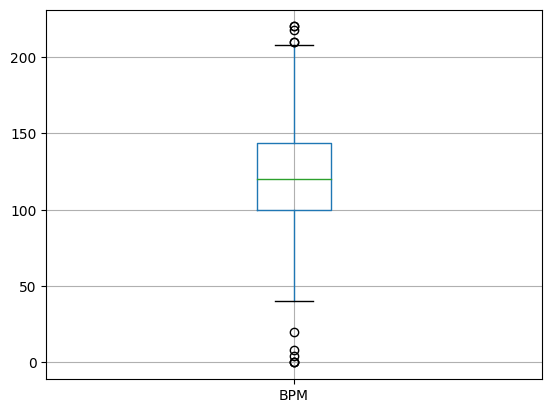

In [35]:
data[['BPM']].boxplot()

In [36]:
data[['BPM']].max()

BPM    220.0
dtype: float64

There are not so many missing values, so I decided to delete the lines concerned. 

In [39]:
processed_df = pd.read_csv('../data/processed_results.csv')
processed_df.shape

(616, 34)

In [40]:
processed_df.columns

Index(['Unnamed: 0', 'Timestamp', 'Age', 'Primary streaming service',
       'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Fav genre', 'Exploratory', 'Foreign languages', 'BPM',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects', 'Permissions'],
      dtype='object')

In [43]:
processed_df["Permissions"].unique()

array(['I understand.'], dtype=object)

In [44]:
ml_dp = processed_df[['Age', 'Primary streaming service',
       'Hours per day', 'While working',
       'Fav genre', 'Exploratory', 'Foreign languages', 'BPM',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects']].copy()

In [47]:
ml_dp.head()

,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,4.0,No,Video game music,No,Yes,132.0,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
1,61.0,YouTube Music,2.5,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
2,18.0,Spotify,4.0,Yes,R&B,Yes,No,107.0,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
3,18.0,Spotify,5.0,Yes,Jazz,Yes,Yes,86.0,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
4,18.0,YouTube Music,3.0,Yes,Video game music,Yes,Yes,66.0,Sometimes,Never,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
